The Grammar of Graphics:
1. Data - Raw data that we'd like to visualize
2. Geometries - Shapes that we use to visualize data
3. Aesthetics - Properties of geometries(size, color, shape, etc)
4. Scales - Mappings between geometries and aesthetics.

In [ ]:
# Reading / importing data.
# read_csv() - Reads each file in row with comma separated

In [ ]:
library(tidyverse)
college_data <- read_csv("http://672258.youcanlearnit.net/college.csv")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 1269 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): name, city, state, region, highest_degree, control, gender, loan_de...
dbl (9): id, admission_rate, sat_avg, undergrads, tuition, faculty_salary_av...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Cleaning the Data

In [ ]:
# printing the quantitative attributes for each features/columns
summary(college_data)

       id             name               city              state          
 Min.   :100654   Length:1269        Length:1269        Length:1269       
 1st Qu.:153250   Class :character   Class :character   Class :character  
 Median :186283   Mode  :character   Mode  :character   Mode  :character  
 Mean   :186988                                                           
 3rd Qu.:215284                                                           
 Max.   :484905                                                           
    region          highest_degree       control             gender         
 Length:1269        Length:1269        Length:1269        Length:1269       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

In [ ]:
# grouping the features/column by the rows values/numbers.
college_data <- college_data %>% 
    mutate(state= as.factor(state), 
          region= as.factor(region), 
          highest_degree=as.factor(highest_degree), 
          control=as.factor(control), 
          gender=as.factor(gender))

In [ ]:
summary(college_data)

       id             name               city               state    
 Min.   :100654   Length:1269        Length:1269        PA     :101  
 1st Qu.:153250   Class :character   Class :character   NY     : 84  
 Median :186283   Mode  :character   Mode  :character   CA     : 71  
 Mean   :186988                                         TX     : 63  
 3rd Qu.:215284                                         OH     : 52  
 Max.   :484905                                         IL     : 47  
                                                        (Other):851  
       region      highest_degree    control      gender     admission_rate  
 Midwest  :353   Associate:  20   Private:763   CoEd :1237   Min.   :0.0509  
 Northeast:299   Bachelor : 200   Public :506   Men  :   4   1st Qu.:0.5339  
 South    :459   Graduate :1049                 Women:  28   Median :0.6687  
 West     :158                                               Mean   :0.6501  
                                                  

In [ ]:
# show the unique values
unique(college_data$loan_default_rate)

# R doesnot represent null value as "NULL" -> Its "Na"

In [ ]:
college_data <- college_data %>% 
    mutate(loan_default_rate=as.numeric(loan_default_rate))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


# Visualization 

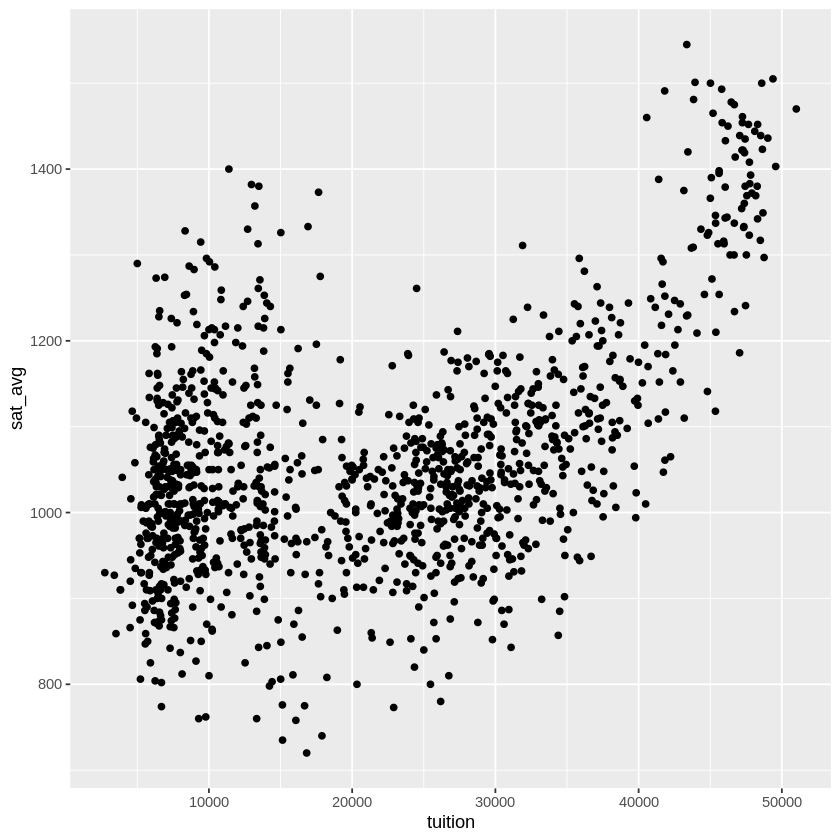

In [ ]:
# using ggplot2
# ggplot() # creates an empty plot
# ggplot(data=college_data) # loaded data but plot knows nothing what to do.
# now adding geometry -> geom_point -> mapping with aesthetics for (coordinates ).

ggplot(data=college_data) + geom_point(mapping = aes(x=tuition,y=sat_avg))


# Scatter plots 
  - plot points on a grid in x and y coordinate
  - creates scatterplots with geom_point()
  - requires x and y values
  - Alows the use of other aesthetics such as color, shape, size, transparency(alpha) etc.


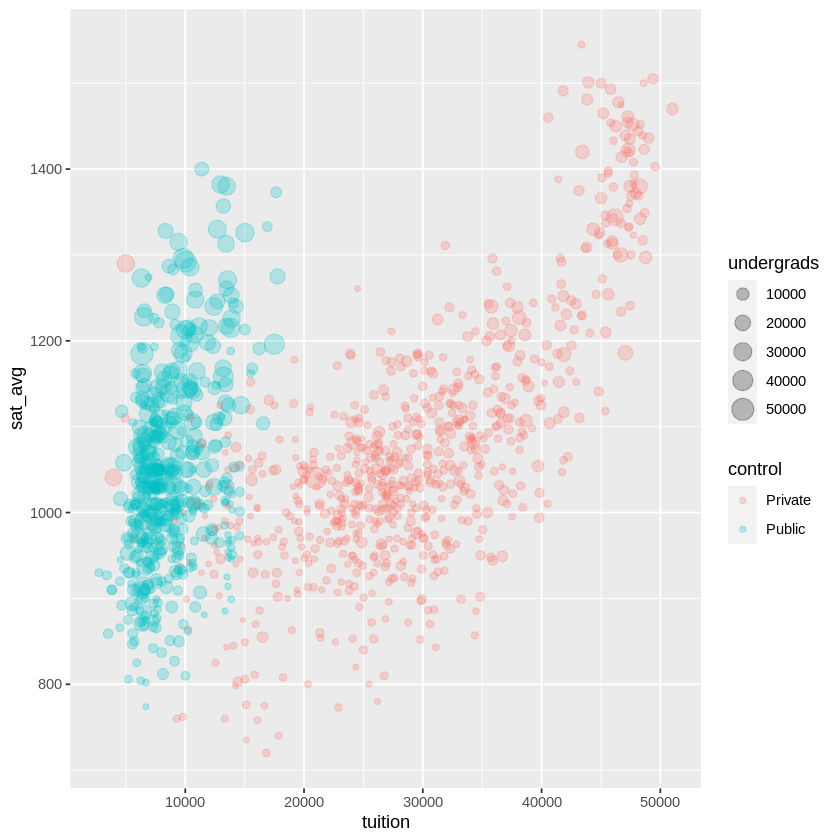

In [ ]:
ggplot(data=college_data) + 
  geom_point(mapping = aes(x=tuition,y=sat_avg, color=control, size=undergrads,), alpha=0.25)


# Lines and Smoothers

  - connect the points in a dataset with geom_line()
  - fit a line to pints with geom_smooth()
  - set the same aesthetics for lines as scatterplots


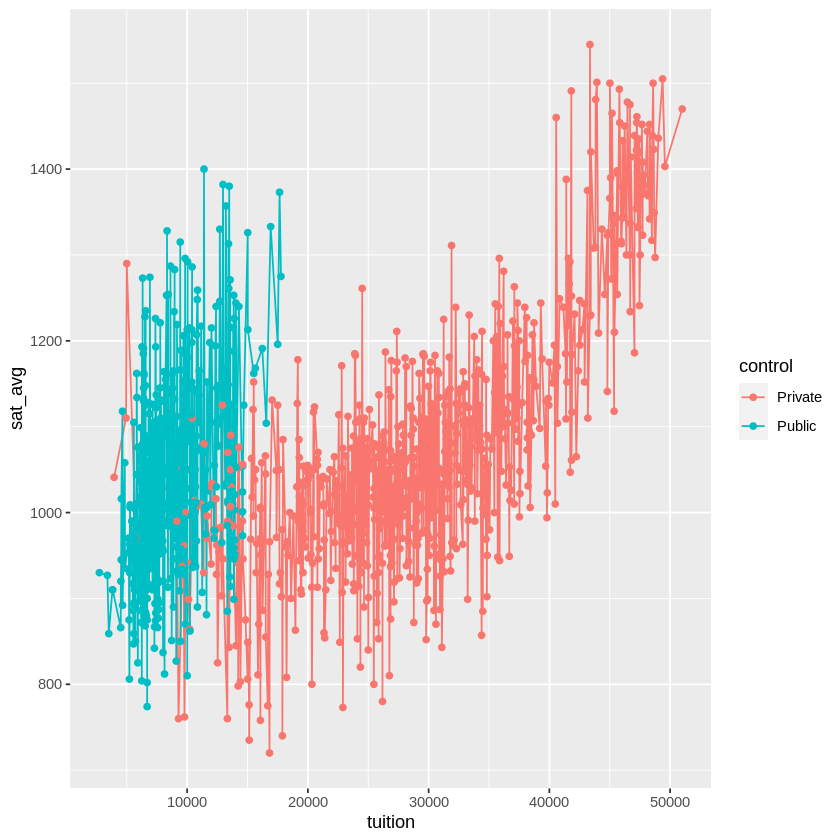

In [ ]:
ggplot(data=college_data) + 
  geom_line(mapping = aes(x=tuition,y=sat_avg, color=control)) + 
  geom_point(mapping = aes(x=tuition,y=sat_avg, color=control))


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



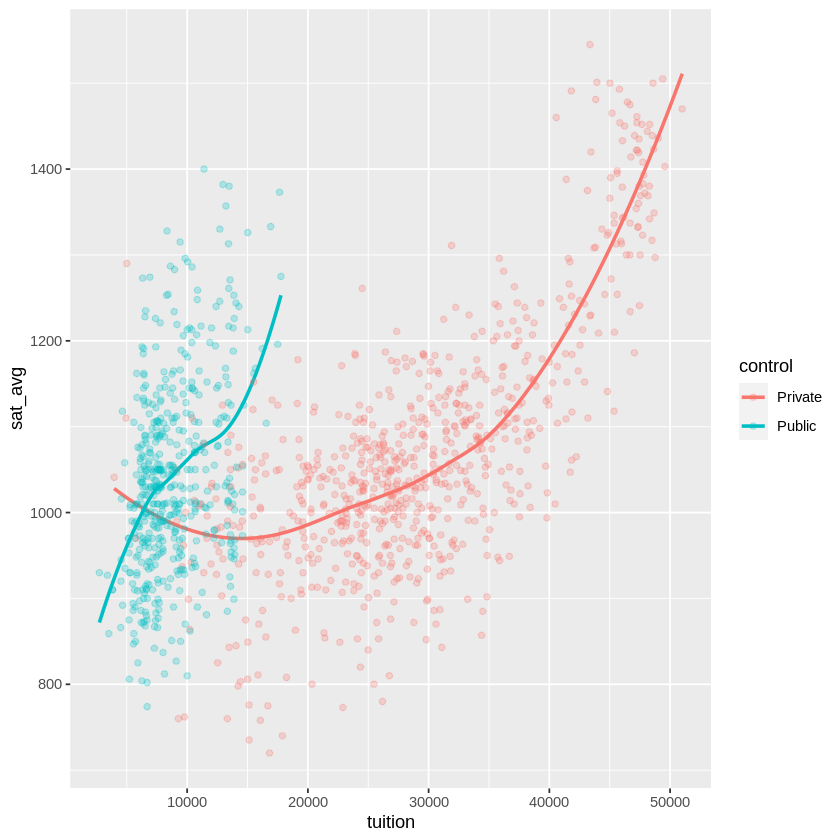

In [ ]:
# se - standard error
# geom_smooth() - used to fit a line 

ggplot(data=college_data, mapping = aes(x=tuition,y=sat_avg, color=control)) + 
    geom_smooth(se=FALSE) + geom_point(alpha=0.25)


# Bar and Column charts 

1. geom_bar() 
  - Creates a bar graph
  - Allows user to specify x-axis value
  - Uses count as the y-axis value

2. geom_col()
  - Creates a column graph
  - Allows user to specify x-axis value
  - Allows user to specify y-axis value


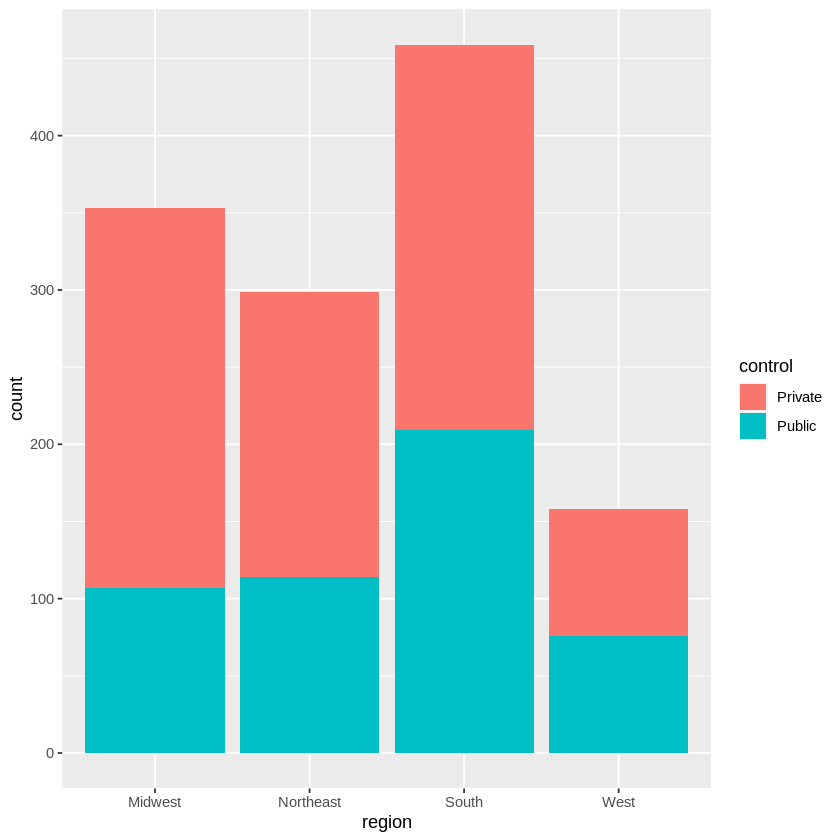

In [ ]:
# bar chart
ggplot(data=college_data) + 
  geom_bar(mapping= aes(x=region, fill=control))


In [ ]:
# grouping and summarizing by a specific field 
college_data %>% group_by(region) %>% summarize(average_tuition=mean(tuition))

region    average_tuition
1 Midwest   22114.78       
2 Northeast 25297.97       
3 South     17263.13       
4 West      21430.99

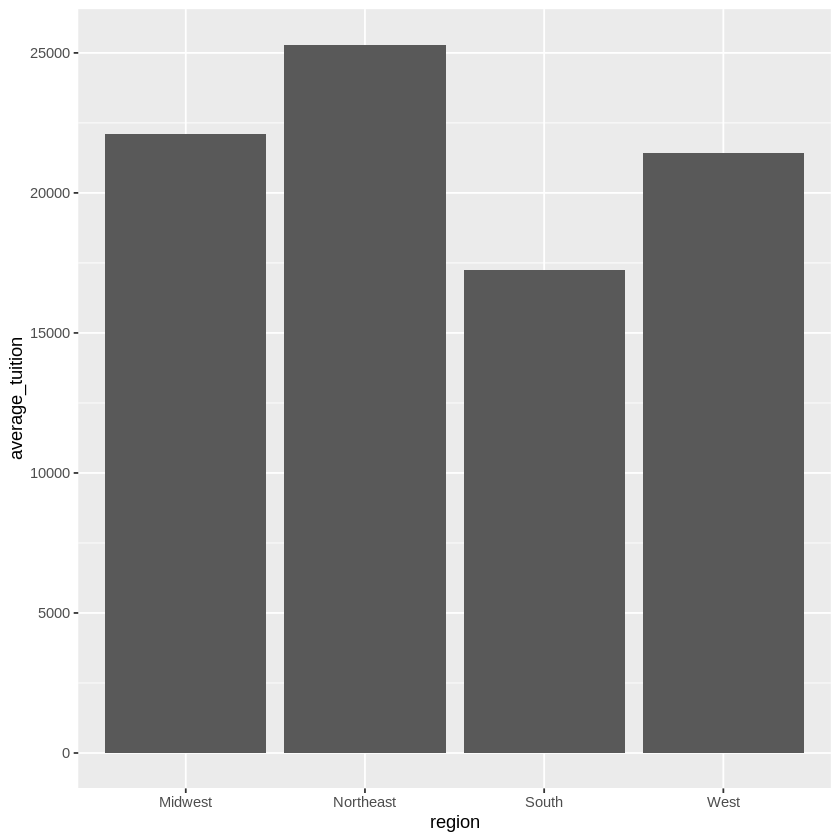

In [ ]:
# column chart
college_data %>% group_by(region) %>% summarize(average_tuition=mean(tuition)) %>% 
  ggplot() +
  geom_col(mapping= aes(x=region, y=average_tuition))


# Histograms
 - Histograms are a special case of bar graphs that allow us to work
with continuous variables that don't easily lend themselves to bar graphs.


Warning message:
“`origin` is deprecated. Please use `boundary` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



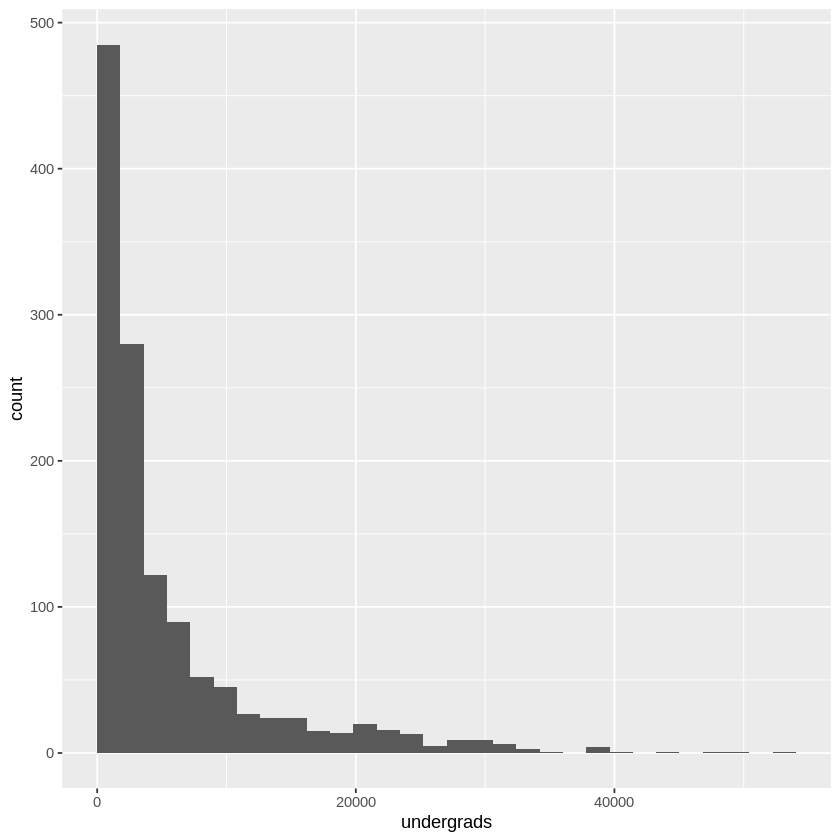

In [ ]:
ggplot(data = college_data) + geom_histogram(mapping=aes(x=undergrads), origin=0)

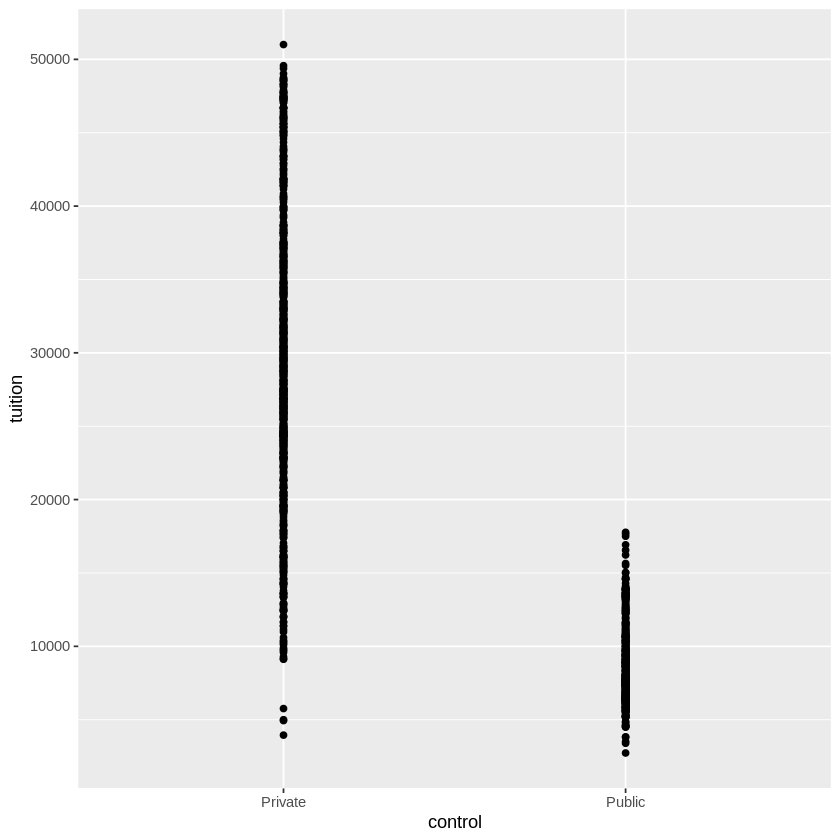

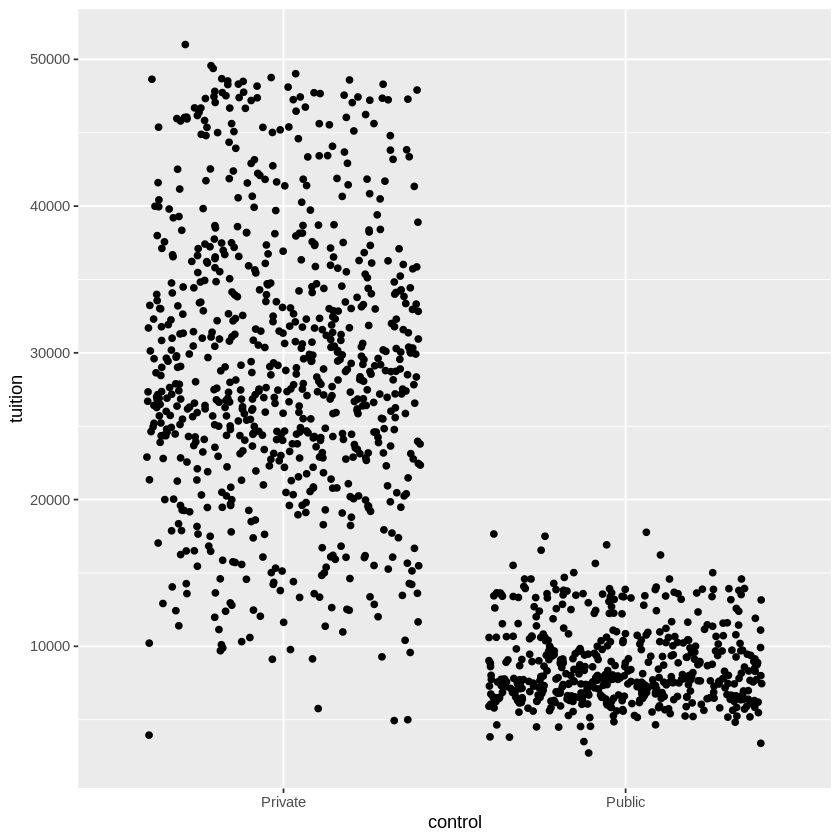

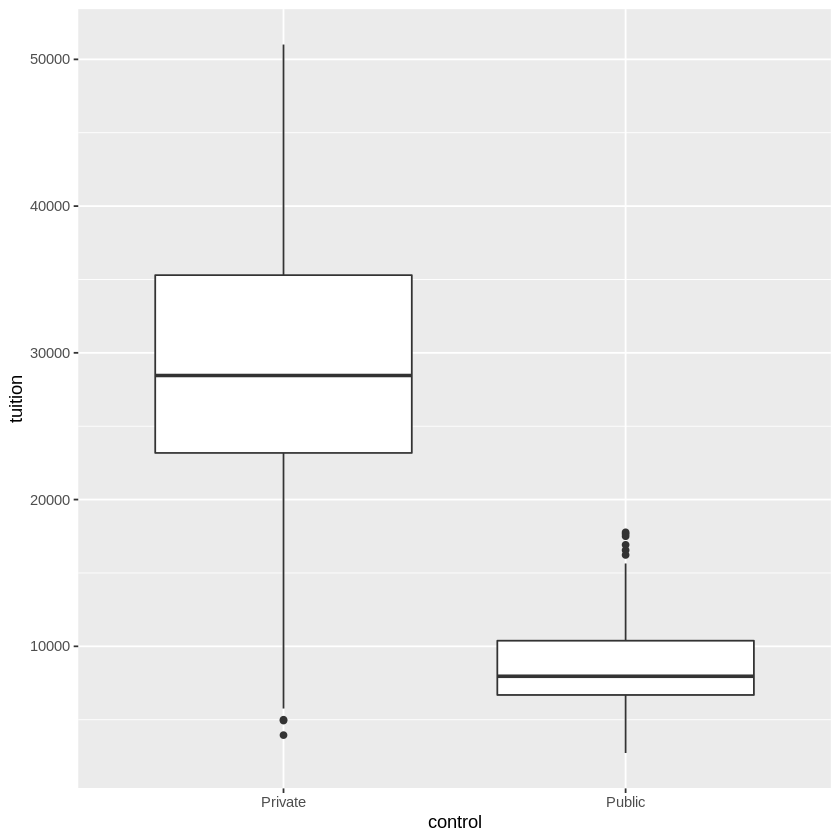

In [ ]:
# Boxplots - are tool that helps us visualize a dataset and provides
# a little more statistical insight than a simple scatter plot.
ggplot(data=college_data,mapping = aes(x = control, y=tuition)) + 
geom_point() 

# jitter plot
ggplot(data=college_data,mapping = aes(x = control, y=tuition)) + 
geom_jitter() 

# box plot
ggplot(data=college_data,mapping = aes(x = control, y=tuition)) + geom_boxplot()

# Modifying the Background

Attributes
  - plot.background
  - plot.panel
  - panel.grid.major
  - panel.grid.minor

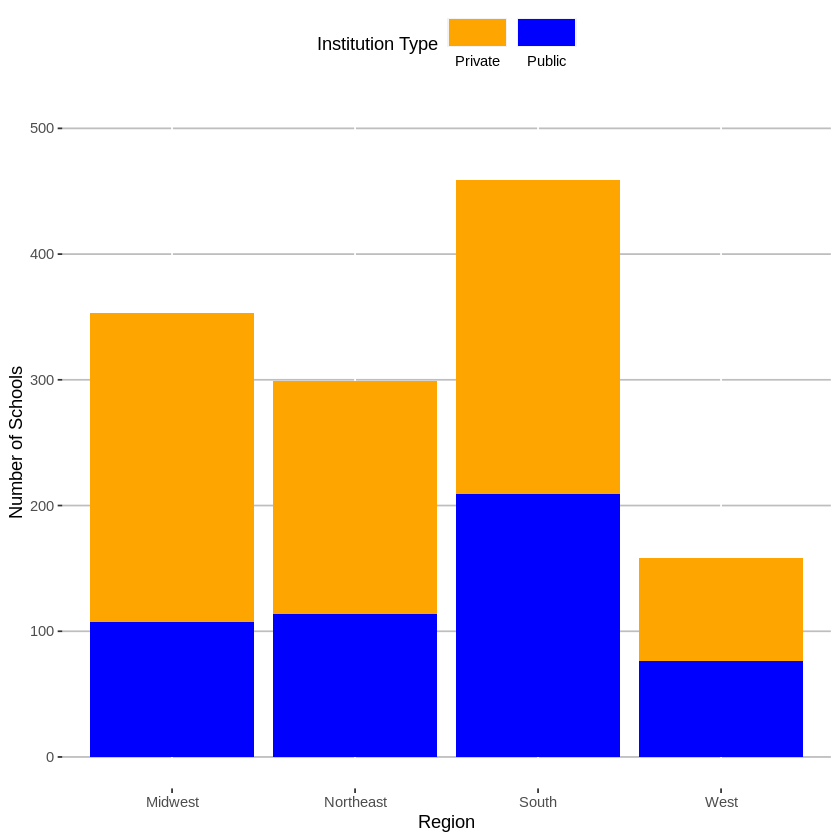

In [ ]:
# bar chart with manual changes
ggplot(data=college_data,mapping = aes(x=region, fill=control)) + 
  geom_bar() + 
  theme(panel.background = element_blank()) + 
  theme(plot.background = element_blank()) +
  theme(panel.grid.major.y = element_line(color='grey')) +
  ylab("Number of Schools") +  # scale_y_continuous(name='Number of Schools', limits=c(0,500))
  xlab("Region") + # scale_x_discrete(name='Region')
  ylim(0,500) +
  scale_fill_manual(values=c("Orange","blue"),
    guide=guide_legend(title = "Institution Type", 
      nrow=1,
      label.position = "bottom",
      keywidth=2.5 )) +
  theme(legend.position = "top")



# Annotating Visualizations

1. annotate() adds text and shapes.
2. geom_hline() adds horizontal lines.
3. geom_vline() adds vertical lines.

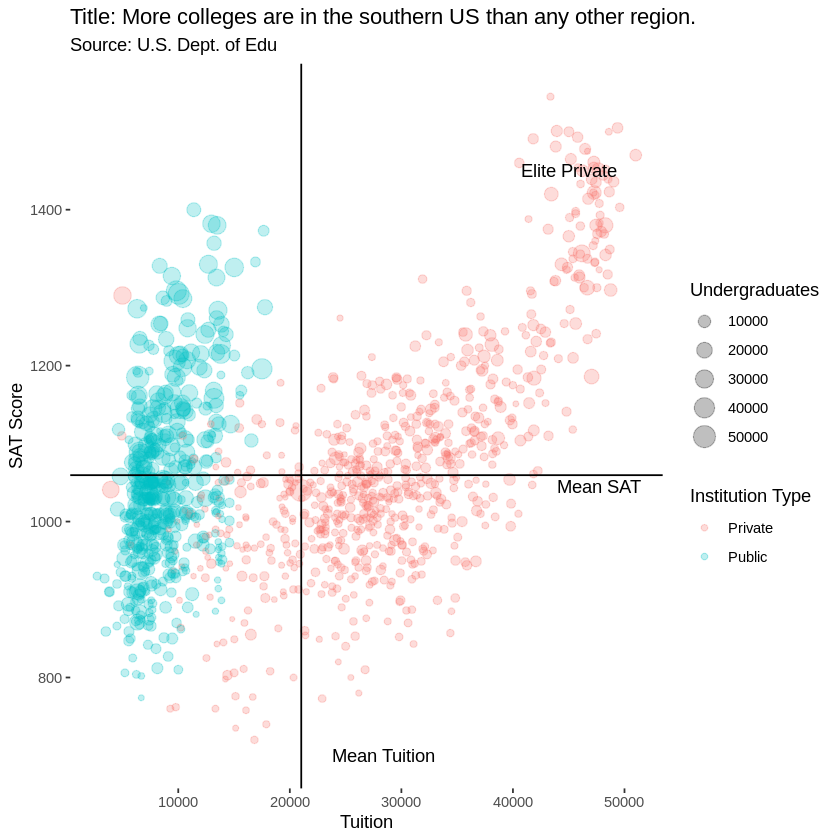

In [ ]:
ggplot(data=college_data) +
  geom_point(mapping=aes(x=tuition, y=sat_avg, color= control, size= undergrads),
    alpha=0.25) +
  annotate("text", label="Elite Private", x=45000, y=1450) +
  geom_hline(yintercept = mean(college_data$sat_avg)) + 
  annotate("text", label=" Mean SAT", x=47500, y = mean(college_data$sat_avg)-15) +
  geom_vline(xintercept = mean(college_data$tuition)) +
  annotate("text", label="Mean Tuition", y=700, x=mean(college_data$tuition)+7400) +
  theme(panel.background = element_blank(), legend.key = element_blank()) + 
  scale_color_discrete(name="Institution Type") +
  scale_size_continuous(name="Undergraduates") +
  scale_x_continuous(name="Tuition") +
  scale_y_continuous(name="SAT Score") +
  ggtitle("Title: More colleges are in the southern US than any other region.", subtitle = "Source: U.S. Dept. of Edu")

In [ ]:
# themes 
# library(tidyverse) 
# library(ggthemes)
# ggplot(data = college_data) + 
#   geom_bar(mapping = aes(x=region, fill=control)) +
#   theme_excel()

# Geospatial Visualization 
  - Visualizing data with MAPs.
  - Obtaining google maps API key.
  - Working with MAPs
  

In [ ]:
# Before using google api key you will have to create one!
# install packages in Rstudio- install.packages('devtools').
# install ggmap library - devtools::install_github("dkahle/ggmap").
# google map api key - "your key here!"
# register_google(key="key") <- Access google API

In [ ]:
library(ggmap)

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [ ]:
register_google(key="YourAPIKey")

In [ ]:
toronto <- get_map("Toronto, ON", zoom=15)

Source : https://maps.googleapis.com/maps/api/staticmap?center=Toronto,%20ON&zoom=15&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Toronto,+ON&key=xxx



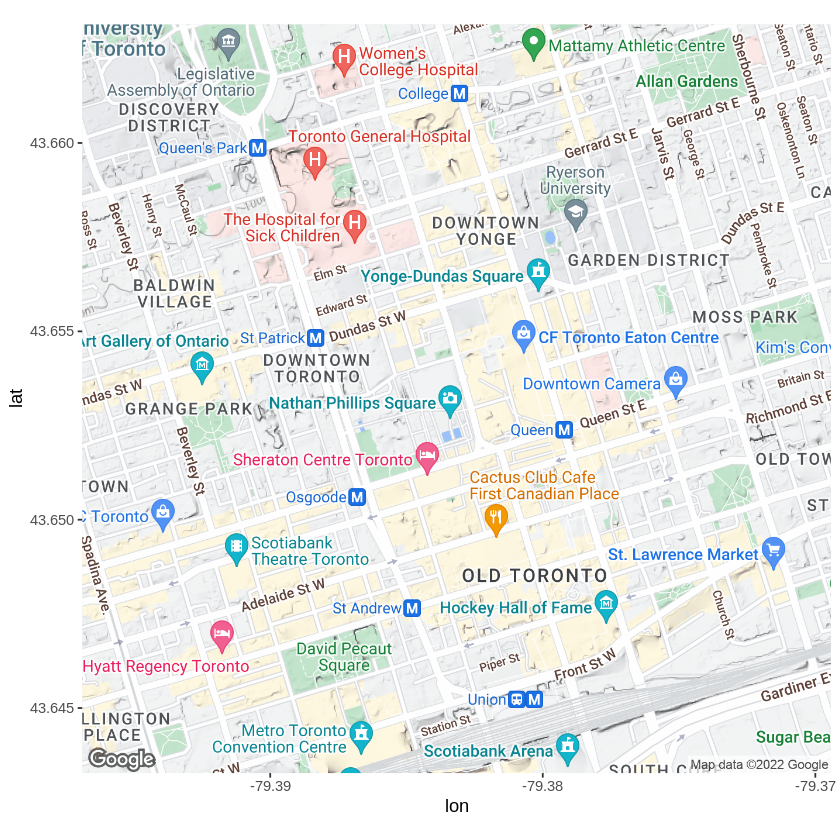

In [ ]:
ggmap(toronto)

# Geocoding
  Converts a character string to a latitude and longitude location.


Source : https://maps.googleapis.com/maps/api/geocode/json?address=Toronto,+ON&key=xxx

Source : https://maps.googleapis.com/maps/api/staticmap?center=43.653226,-79.383184&zoom=15&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx



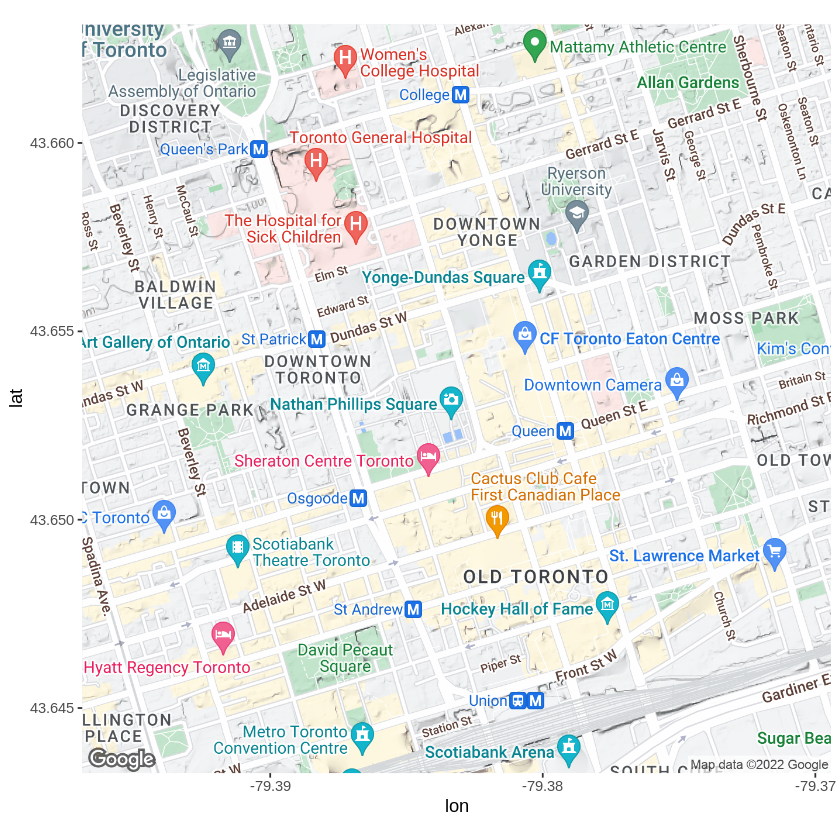

In [ ]:
# default map type- terrain
toronto_map <- geocode("Toronto, ON")
ggmap(get_map(toronto_map,zoom=15))

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Toronto,+ON&key=xxx

Source : https://maps.googleapis.com/maps/api/staticmap?center=43.653226,-79.383184&zoom=10&size=640x640&scale=2&maptype=hybrid&language=en-EN&key=xxx



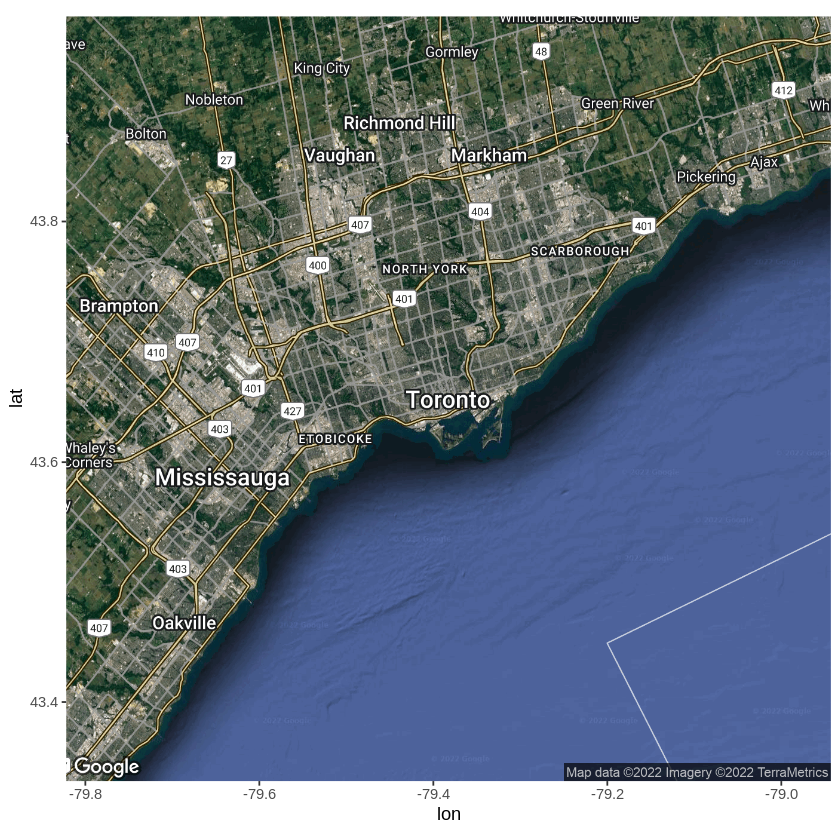

In [ ]:
# changing maps type.
# types

# terrain
# satellite
# terrain-labels
# terrain-lines
# toner
# toner - lite
# toner-background 
 
toronto_map <- geocode("Toronto, ON")
ggmap(get_map(toronto_map, maptype="hybrid")) #hybrid - satellite and terrain.

In [ ]:
# plotting the points in the map.
toronto <- geocode("Toront, ON")
usa <- geocode("United States")

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Toront,+ON&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=United+States&key=xxx



Source : https://maps.googleapis.com/maps/api/staticmap?center=43.653226,-79.383184&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx



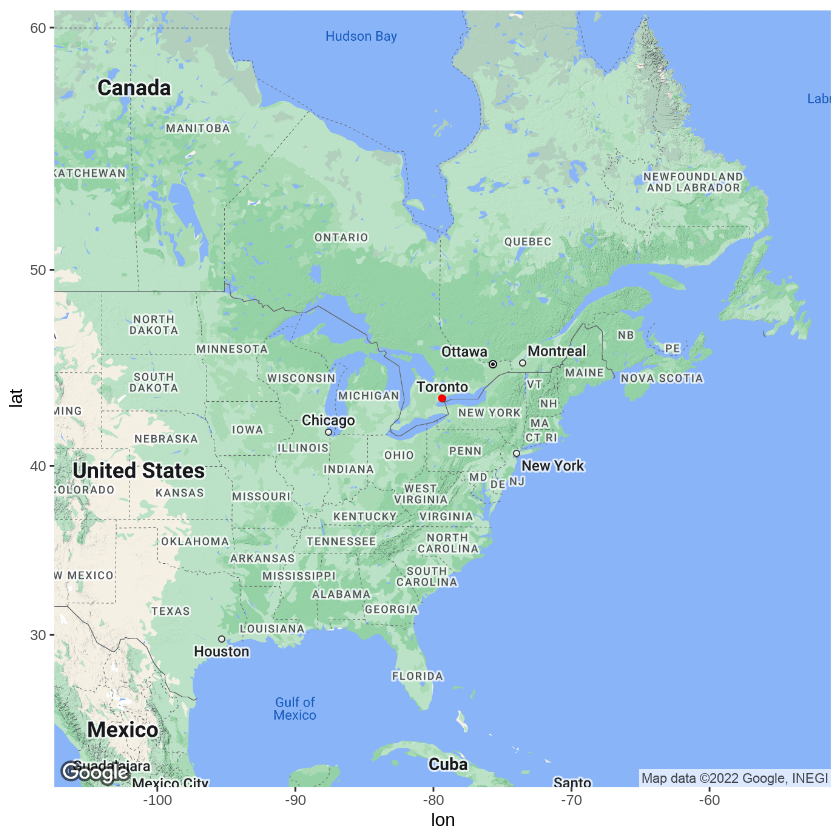

In [ ]:
# map points
ggmap(get_map(toronto,zoom=4)) + 
    geom_point(mapping= aes(x=lon, y=lat), color='red',data=toronto)

Source : https://maps.googleapis.com/maps/api/geocode/json?address=CN+Tower&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Niagara+falls&key=xxx

maptype = "watercolor" is only available with source = "stamen".

resetting to source = "stamen"...

Source : https://maps.googleapis.com/maps/api/staticmap?center=43.653226,-79.383184&zoom=8&size=640x640&scale=2&maptype=terrain&key=xxx

Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under CC BY SA.



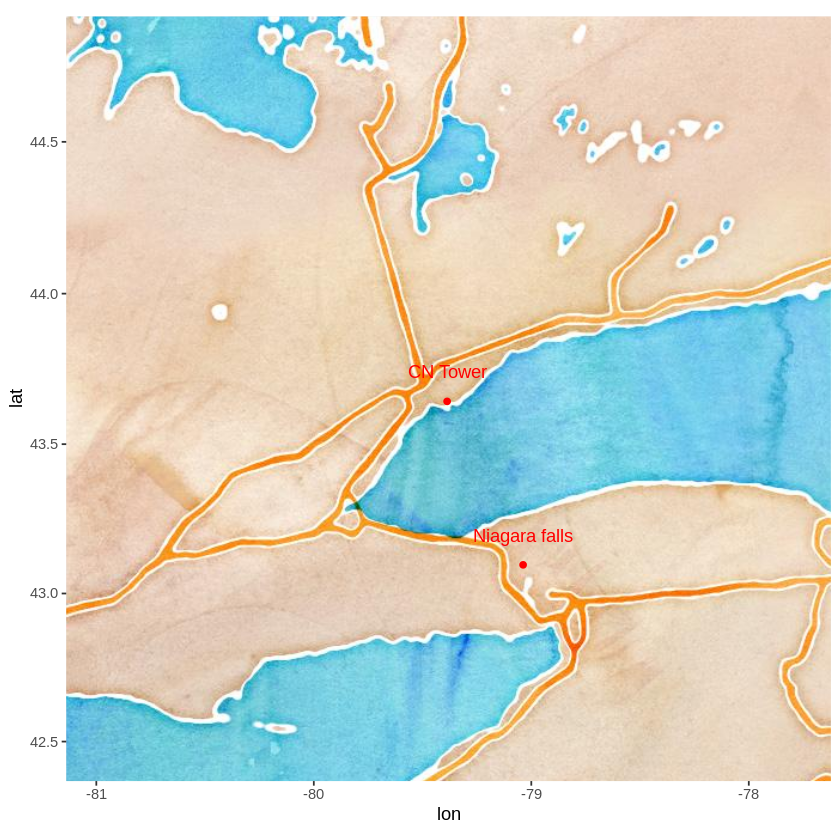

In [ ]:
place_name <- c("CN Tower", "Niagara falls")
location <- geocode(place_name)
places <- tibble(name=place_name, lat=location$lat, lon=location$lon)
ggmap(get_map(toronto, zoom=8, maptype = "watercolor")) +
    geom_point(mapping=aes(x=lon, y=lat), color="red", data=places) +
    geom_text(mapping = aes(x=lon, y=lat, label=name), 
        color='red',  
        data=places, 
        nudge_y=0.1)

In [ ]:
# requires map library.
# canada <- map_data("canada")
# ggplot(data=canada, mapping = aes(x=long, y=lat, group=group)) +
#     geom_polygon() +
#     coord_map() + 
#     theme(axis.ticks = element_blank(),
#         axis.text = element_blank(),
#         axis.title = element_blank(),
#         panel.background = element_blank())

# Choropleth Maps
  - Allow us to see regional differences in the data.

In [95]:
install.packages("ggmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Source : https://maps.googleapis.com/maps/api/geocode/json?address=Los+Angeles&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=San+Diego&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=San+Jose&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=San+Francisco&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Fresno&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Sacramento&key=xxx



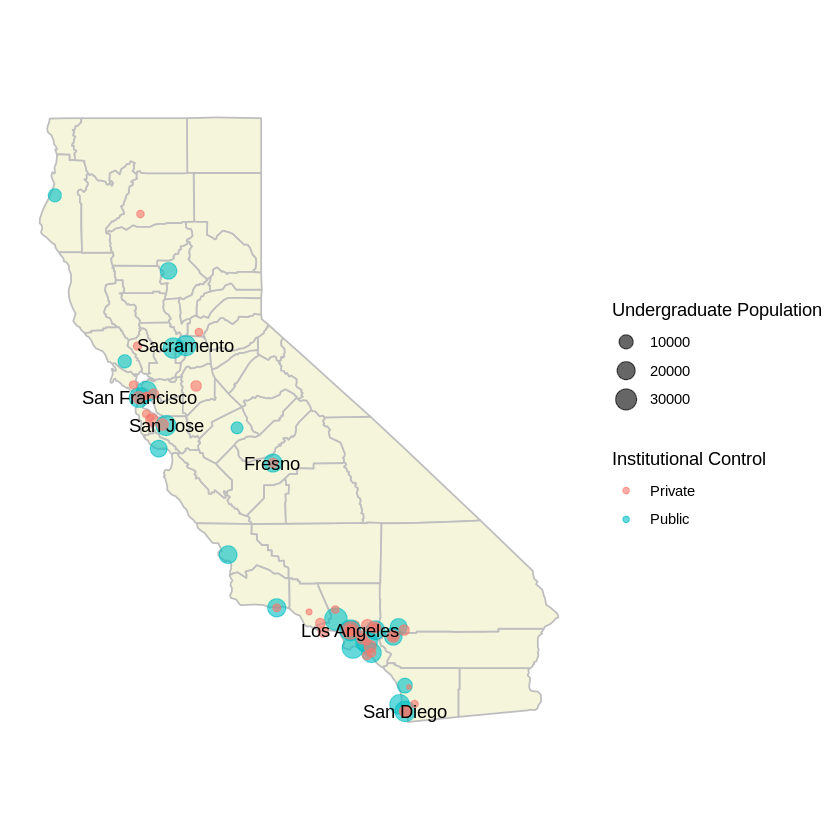

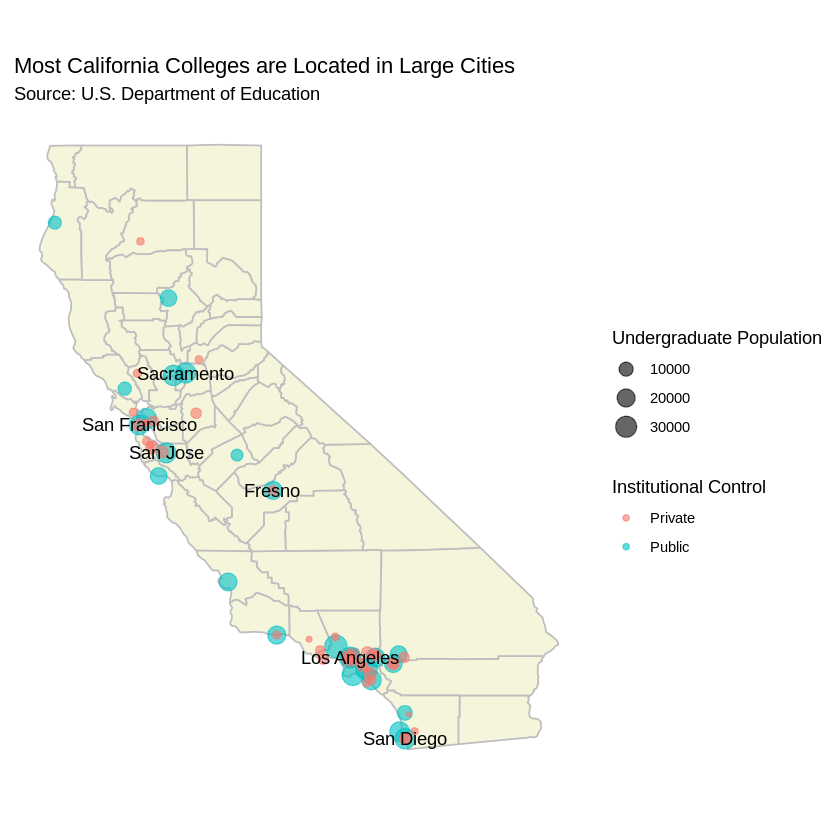

In [96]:

library(ggmap)
# Create a tibble of city names and locations

# Load a map of California
california <- map_data(map="county", region="California")

# Restrict the dataset to California schools
college <- college_data %>%
  filter(state=="CA")

city_names <- c("Los Angeles", "San Diego", "San Jose", "San Francisco", "Fresno", "Sacramento")
locations <- geocode(city_names)
cities <- tibble (name=city_names, lat=locations$lat, lon=locations$lon)

# Create the plot
ggplot(california) +
  geom_polygon(mapping=aes(x=long,y=lat,group=group), color="grey", fill="beige") +
  coord_map() +
  theme(plot.background=element_blank(), 
        panel.background = element_blank(), 
        axis.title=element_blank(), 
        axis.ticks=element_blank(), 
        axis.text=element_blank()) +
  geom_point(data=college, mapping=aes(x=lon, y=lat, color=control, size=undergrads), alpha=0.6) +
  geom_text(data=cities, mapping=aes(x=lon, y=lat, label=name)) +
  scale_size_continuous(name="Undergraduate Population") +
  scale_color_discrete(name="Institutional Control") +
  theme(legend.key=element_blank())

# Add a title and subtitle
ggplot(california) +
  geom_polygon(mapping=aes(x=long,y=lat,group=group), color="grey", fill="beige") +
  coord_map() +
  theme(plot.background=element_blank(), 
        panel.background = element_blank(), 
        axis.title=element_blank(), 
        axis.ticks=element_blank(), 
        axis.text=element_blank()) +
  geom_point(data=college, mapping=aes(x=lon, y=lat, color=control, size=undergrads), alpha=0.6) +
  geom_text(data=cities, mapping=aes(x=lon, y=lat, label=name)) +
  scale_size_continuous(name="Undergraduate Population") +
  scale_color_discrete(name="Institutional Control") +
  theme(legend.key=element_blank()) +
  ggtitle("Most California Colleges are Located in Large Cities",
          subtitle="Source: U.S. Department of Education")